<a href="https://colab.research.google.com/github/YuriyVorobyov96/fashion-mnist-analyze/blob/main/fashion_mnist_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST analyze

NN to analyze [Zoolando fashion MNIST products database](https://github.com/zalandoresearch/fashion-mnist)

In [ ]:
from tensorflow.python import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils

import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
from PIL import Image


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

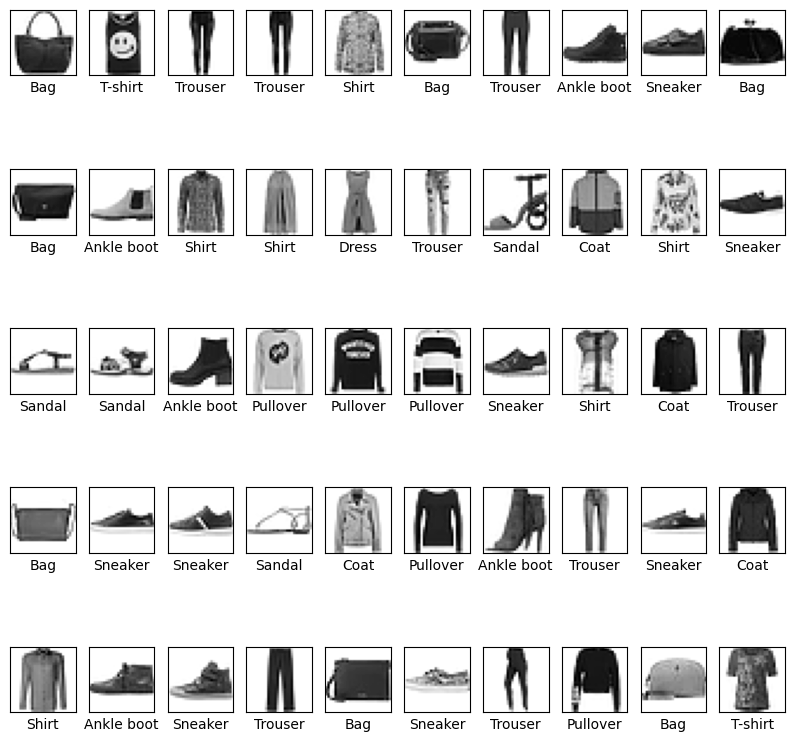

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [ ]:
# Prepare data for training

x_train = x_train.reshape(60000, 784)
x_train = x_train / 255

In [ ]:
# Prepare output

y_train = utils.to_categorical(y_train, 10)

In [ ]:
# Create model with IO layers

model = Sequential()

model.add(Dense(800, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [ ]:
print(model.summary())

In [ ]:
history = model.fit(x_train,
                    y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 3s 12ms/step - loss: 1.1954 - accuracy: 0.6518 - val_loss: 0.8418 - val_accuracy: 0.7394
Epoch 2/100
240/240 [==============================] - 3s 11ms/step - loss: 0.7680 - accuracy: 0.7619 - val_loss: 0.6982 - val_accuracy: 0.7751
Epoch 3/100
240/240 [==============================] - 3s 14ms/step - loss: 0.6686 - accuracy: 0.7906 - val_loss: 0.6338 - val_accuracy: 0.7960
Epoch 4/100
240/240 [==============================] - 3s 11ms/step - loss: 0.6149 - accuracy: 0.8052 - val_loss: 0.5938 - val_accuracy: 0.8043
Epoch 5/100
240/240 [==============================] - 3s 11ms/step - loss: 0.5799 - accuracy: 0.8128 - val_loss: 0.5643 - val_accuracy: 0.8137
Epoch 6/100
240/240 [==============================] - 3s 11ms/step - loss: 0.5546 - accuracy: 0.8199 - val_loss: 0.5443 - val_accuracy: 0.8189
Epoch 7/100
240/240 [==============================] - 3s 14ms/step - loss: 0.5352 - accuracy: 0.8249 - val_loss: 0.5301 - val_accuracy:

In [ ]:
# Start prediction

predictions = model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [ ]:
# Prediction result

prediction = np.argmax(predictions[0])

print("Class num:", prediction)
print("Class name:", classes[prediction])

Class num: 9
Class name: Ankle boot


In [ ]:
# Correct result

label = np.argmax(y_train[0])

print("Class num:", label)
print("Class name:", classes[label])

Class num: 9
Class name: Ankle boot


In [ ]:
# Prepare data for testing

x_test = x_test.reshape(10000, 784)
x_train = x_train / 255

In [ ]:
# Prepare testing output

y_test = utils.to_categorical(y_test, 10)

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

print("The persent of correct answers on test data:", round(scores[1] * 100, 4))

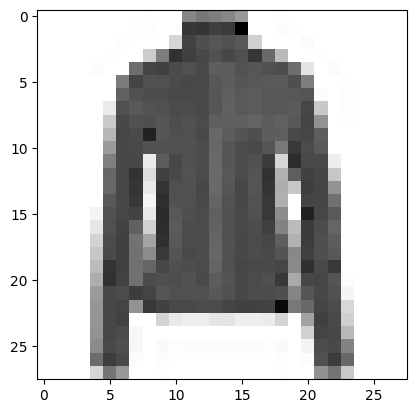

In [ ]:
# Get test image from dataset

test_image = 1234

plt.imshow(x_test[test_image].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
x = x_test[test_image]
x = np.expand_dims(x, axis=0)

In [ ]:
predictions = model.predict(x)

In [ ]:
prediction = np.argmax(predictions[0])

print("Class num:", prediction)
print("Class name:", classes[prediction])

Class num: 4
Class name: Coat


In [ ]:
label = np.argmax(y_test[test_image])

print("Class num:", label)
print("Class name:", classes[label])

Class num: 4
Class name: Coat


In [ ]:
files.upload()

In [ ]:
!ls

In [ ]:
img_path = 'tshirt.jpeg'
img = utils.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

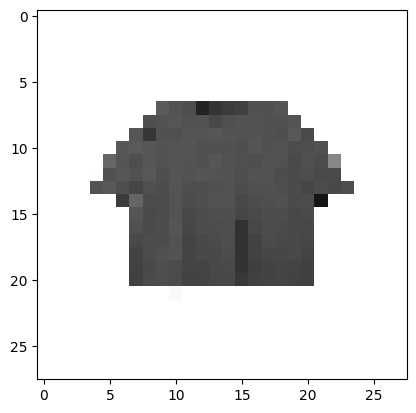

In [ ]:
plt.imshow(img.convert('RGBA'))
plt.show()

In [ ]:
x = utils.img_to_array(img)
x = x.reshape(1, 784)
x = 255 - x
x = x / 255

In [ ]:
prediction = model.predict(x)

In [ ]:
prediction = np.argmax(prediction)

print("Class num:", prediction)
print("Class name:", classes[prediction])

Class num: 0
Class name: T-shirt
